In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as pz
import seaborn as sns

caminho = r"C:\Users\joth1\Documents\Itau-Python\python-analytics-ITAU-\Scikit-learn\datasets\credit_risk_dataset.csv"
caminho = caminho.replace('\\', '/')

base_risco_credito = pd.read_csv(caminho)
base_risco_credito

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [72]:
# Selecionar e renomear as colunas
df = base_risco_credito[['person_age', 'person_income', 'loan_amnt', 'loan_status']].rename(columns={
    'person_age': 'age'
    ,'person_income': 'income'
    ,'loan_amnt': 'loan'
    ,'loan_status': 'default'
})
display(df)
df.describe()

,age,income,loan,default
0,22,59000,35000,1
1,21,9600,1000,0
2,25,9600,5500,1
3,23,65500,35000,1
4,24,54400,35000,1
...,...,...,...,...
32576,57,53000,5800,0
32577,54,120000,17625,0
32578,65,76000,35000,1
32579,56,150000,15000,0


,age,income,loan,default
count,32581.000000,3.258100e+04,32581.000000,32581.000000
mean,27.734600,6.607485e+04,9589.371106,0.218164
std,6.348078,6.198312e+04,6322.086646,0.413006
min,20.000000,4.000000e+03,500.000000,0.000000
25%,23.000000,3.850000e+04,5000.000000,0.000000
50%,26.000000,5.500000e+04,8000.000000,0.000000
75%,30.000000,7.920000e+04,12200.000000,0.000000
max,144.000000,6.000000e+06,35000.000000,1.000000


In [73]:
# # Apagar somente os registros com valores inconsistentes
# df2 = df.drop(df[df['age'] > 120].index)
# df2.describe()

# Substituir valores inconsistentes pela média do dataframe
display(df['age'].mean())
df.loc[df['age'] > 105, 'age'] = df['age'].mean()

27.73459992019889

C:\Users\joth1\AppData\Local\Temp\ipykernel_38572\1268801399.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '27.73459992019889' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['age'] > 105, 'age'] = df['age'].mean()


### # Faz a divisão dos Previsores e da classe

In [74]:
# Seleciona todas as linhas com ":", depois seleciona as colunas 0,1,2
x_credit = df.iloc[:, 0:3].values
display(x_credit)

# seleciona a coluna da classe 
y_credit = df.iloc[:, 3].values
display(y_credit)

array([[2.200e+01, 5.900e+04, 3.500e+04],
       [2.100e+01, 9.600e+03, 1.000e+03],
       [2.500e+01, 9.600e+03, 5.500e+03],
       ...,
       [6.500e+01, 7.600e+04, 3.500e+04],
       [5.600e+01, 1.500e+05, 1.500e+04],
       [6.600e+01, 4.200e+04, 6.475e+03]])

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [75]:
# puxa os Valoress para ver como está, e é importante deixar um padrão nessas valores, uma vez que a machine learning entende que maiores valors são mais significantes 
display(x_credit[:, 0].max() , x_credit[:, 1].max() , x_credit[:, 2].max())



# Padroniza os dados, para que valores maiores de uma coluna não tenha uma maior relavancia sobre as outras
from sklearn.preprocessing import StandardScaler
scalar_credit = StandardScaler()
x_credit = scalar_credit.fit_transform(x_credit)

# Deixa os Valores Escalonado
x_credit[:, 0].max() , x_credit[:, 1].max() , x_credit[:, 2].max()

94.0

6000000.0

35000.0

(10.683024855872583, 95.7360051810824, 4.019403764559302)

In [76]:
# Separa os registros para treinamento e os registros para teste do modelo
from sklearn.model_selection import train_test_split
x_credit_treinamento, x_teste, y_credit_treinamento,  y_teste  = train_test_split(x_credit, y_credit, test_size=0.25, random_state=0)

display(x_credit_treinamento.shape)
display(y_credit_treinamento.shape)
display(x_teste.shape)
display(y_teste.shape)

(24435, 3)

(24435,)

(8146, 3)

(8146,)

### Salva Base de dados

In [77]:
import pickle

with open('credit.pkl', 'wb') as f:
    pickle.dump((x_credit_treinamento, y_credit_treinamento, x_teste, y_teste), f)


In [78]:
import pickle 
with open(r'C:\Users\joth1\Documents\Itau-Python\cienciaDados\ArvoreDecisao\python-analytics-ArvoreDecisao\credit.pkl', mode = 'rb') as f:
    x_credit_treinamento, y_credit_treinamento, x_teste, y_teste = pickle.load(f)

In [79]:
# import do decisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# o comando Random_stete  é para Quando executar esse algoritmo sempre gerara a mesma decisão
arvore = DecisionTreeClassifier(criterion='entropy', random_state= 0)

arvore.fit(x_credit_treinamento, y_credit_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [80]:
previsoes = arvore.predict(x_teste)
previsoes

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [81]:
display(y_teste)

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

0.816228823962681


0.816228823962681

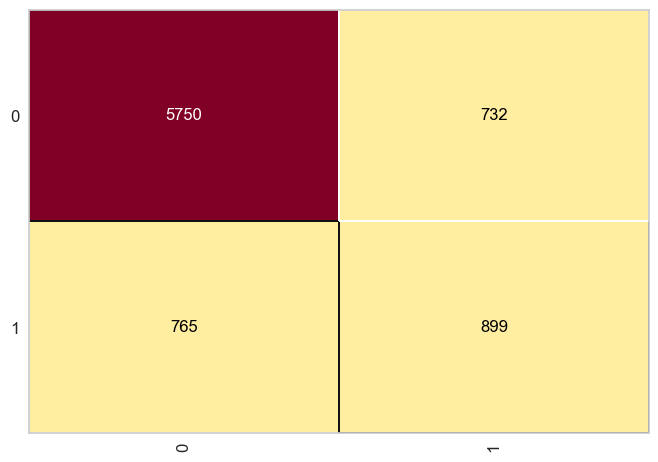

In [82]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_teste, previsoes))

from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_teste, y_teste)

In [83]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      6482
           1       0.55      0.54      0.55      1664

    accuracy                           0.82      8146
   macro avg       0.72      0.71      0.72      8146
weighted avg       0.81      0.82      0.82      8146



In [84]:
#  Aqui vemos que o atributo mais importante é a renda anual, depois o valor do emprestimo, e por fim a idade
arvore.feature_importances_

array([0.22188904, 0.46504514, 0.31306582])

In [85]:
print(f"Profundidade da árvore: {arvore.get_depth()}")
print(f"Número de nós folhas: {arvore.get_n_leaves()}")

# Pega a Classe de Saida, no caso aqui se trata de uma informação binaria, se o cliente pagou ou não o emprestimo
print(arvore.classes_)

Profundidade da árvore: 35
Número de nós folhas: 5102
[0 1]


[Text(0.45535714285714285, 0.9, 'renda_anual <= -0.502\nentropy = 0.765\nsamples = 24435\nvalue = [18991, 5444]\nclass = Não Pagou'),
 Text(0.19642857142857142, 0.7, 'renda_anual <= -0.743\nentropy = 0.994\nsamples = 4668\nvalue = [2538, 2130]\nclass = Não Pagou'),
 Text(0.32589285714285715, 0.8, 'True  '),
 Text(0.10714285714285714, 0.5, 'idade <= -1.054\nentropy = 0.672\nsamples = 794\nvalue = [140, 654]\nclass = Pagou'),
 Text(0.07142857142857142, 0.3, 'renda_anual <= -0.842\nentropy = 0.996\nsamples = 301\nvalue = [140.0, 161.0]\nclass = Pagou'),
 Text(0.03571428571428571, 0.1, '\n  (...)  \n'),
 Text(0.10714285714285714, 0.1, '\n  (...)  \n'),
 Text(0.14285714285714285, 0.3, 'entropy = 0.0\nsamples = 493\nvalue = [0, 493]\nclass = Pagou'),
 Text(0.2857142857142857, 0.5, 'idade <= -0.184\nentropy = 0.959\nsamples = 3874\nvalue = [2398, 1476]\nclass = Não Pagou'),
 Text(0.21428571428571427, 0.3, 'renda_anual <= -0.598\nentropy = 0.837\nsamples = 2888\nvalue = [2117.0, 771.0]\nclass 

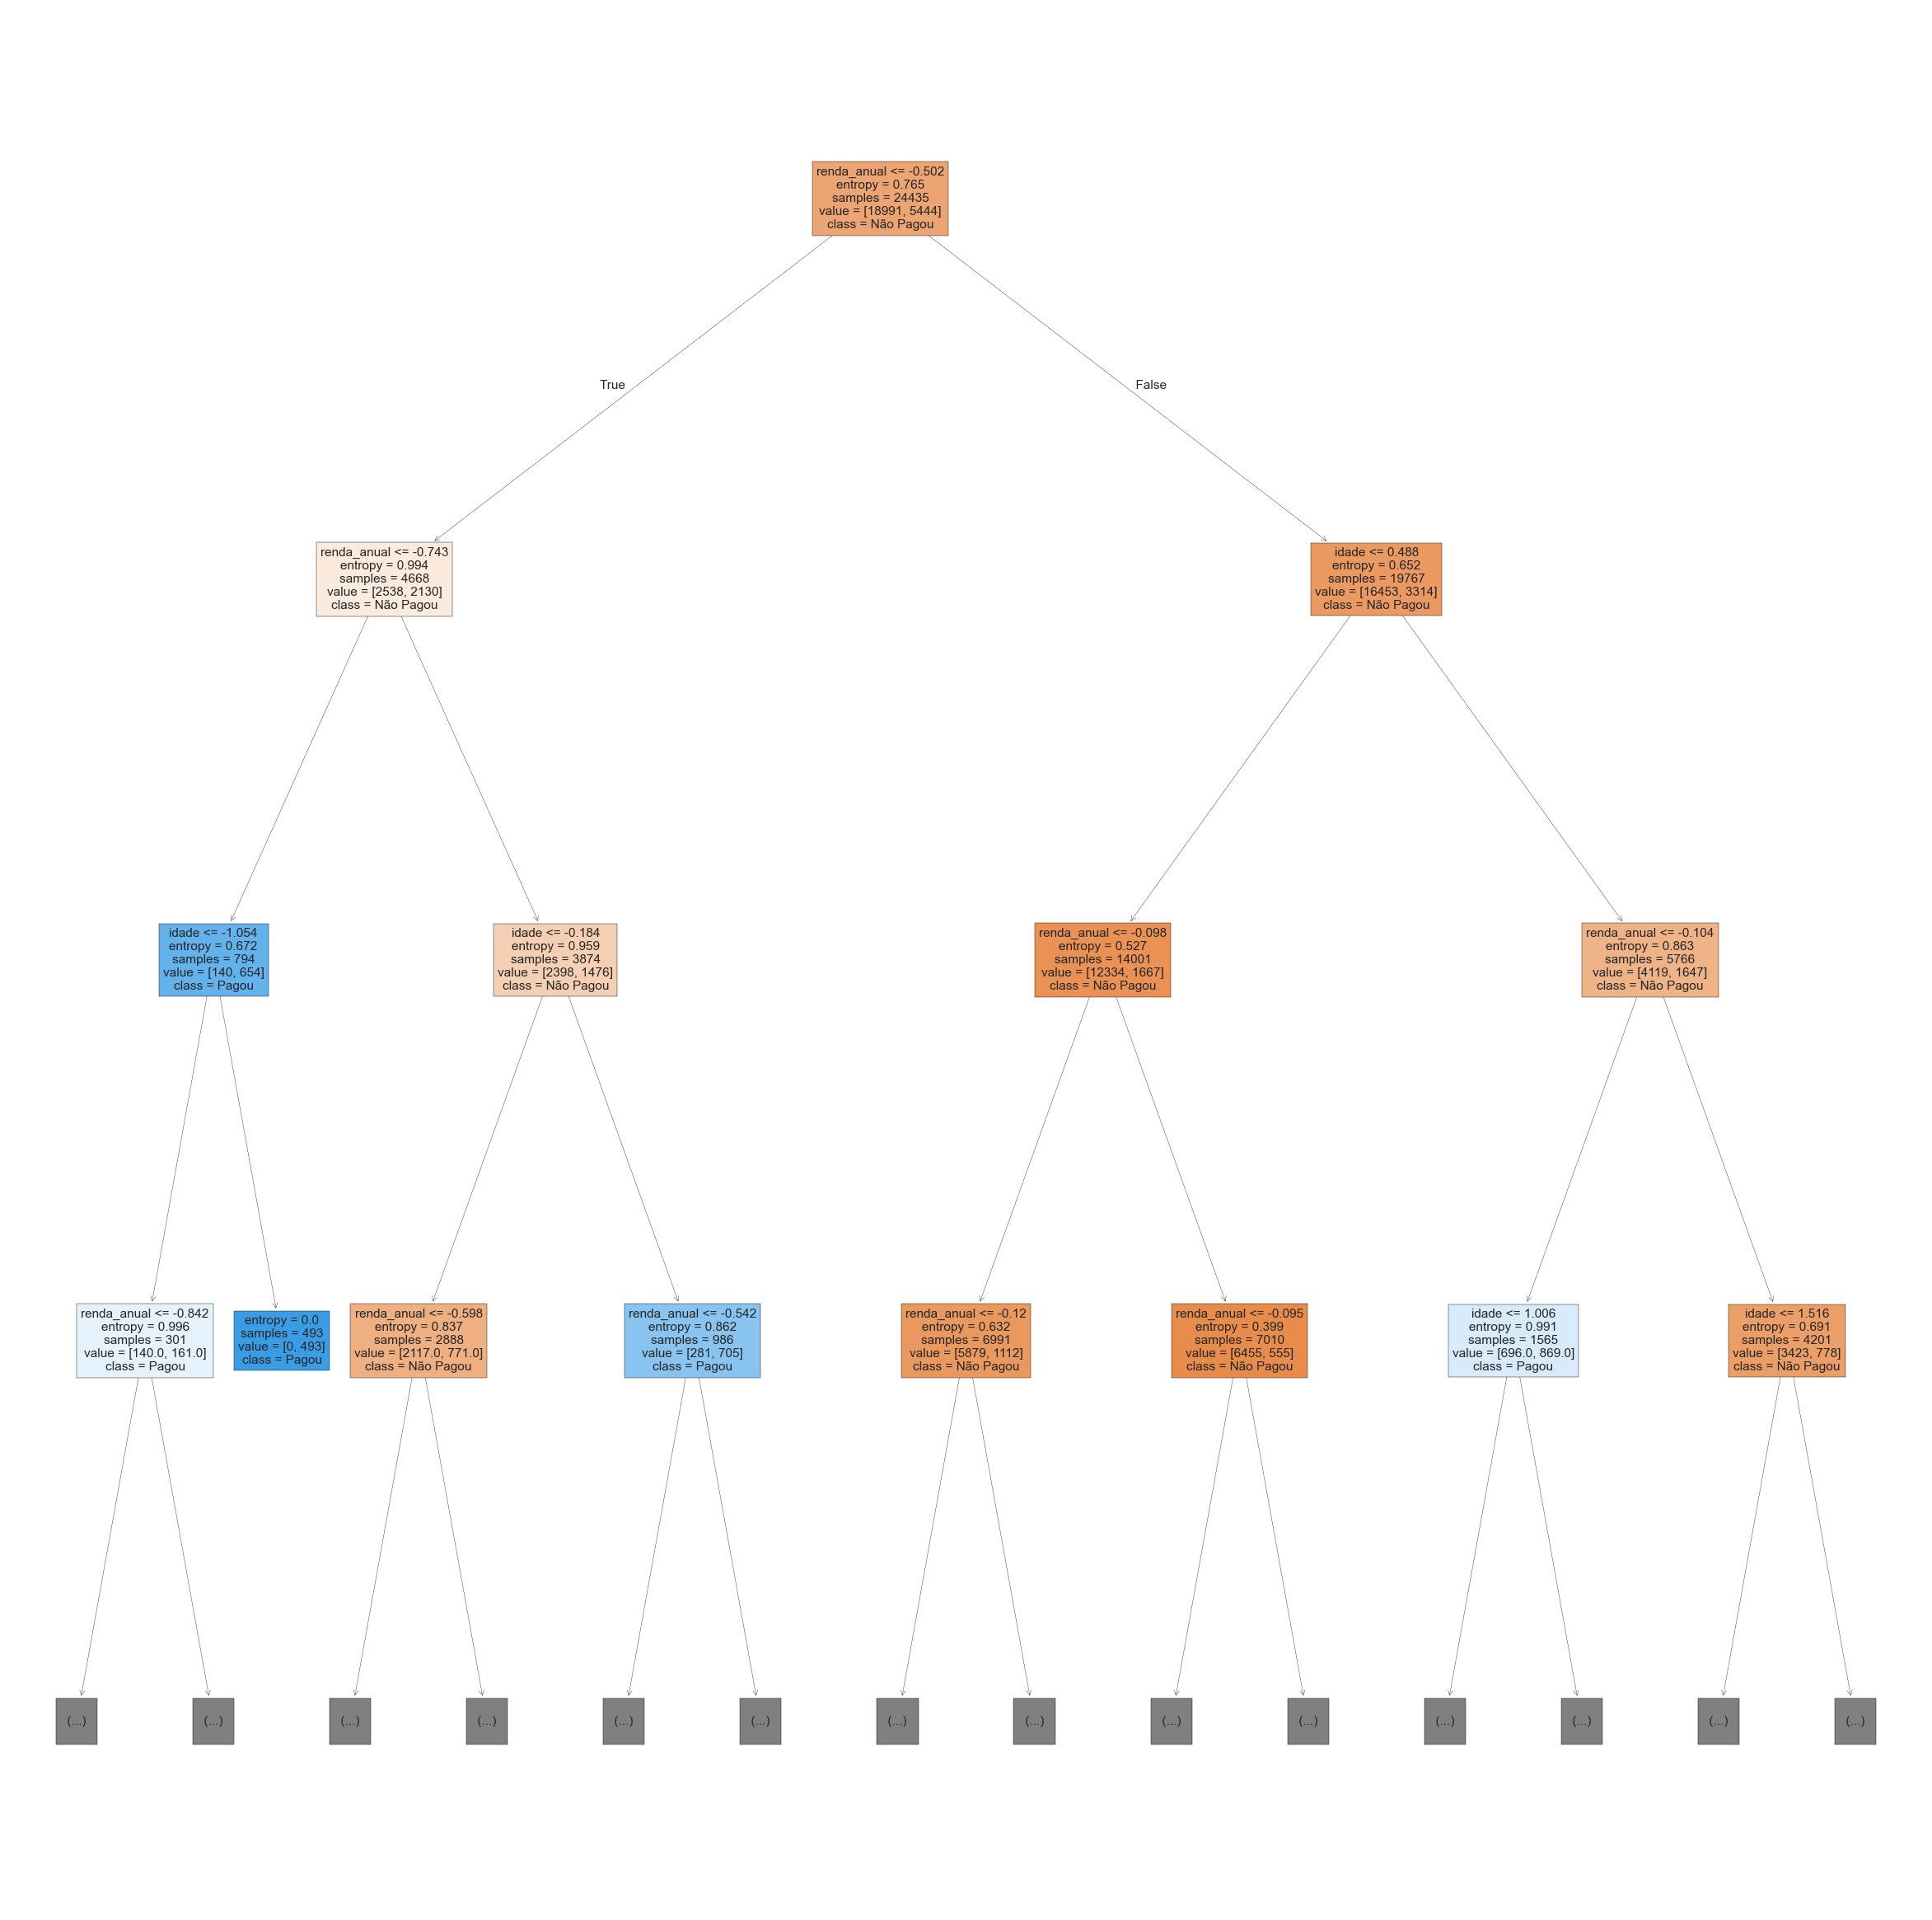

In [86]:
from sklearn import tree
import matplotlib.pyplot as plt

previsores = ['age', 'renda_anual', 'idade']
figura, eixo = plt.subplots(nrows=1, ncols=1, figsize=(30,30))
tree.plot_tree(arvore, filled=True, feature_names=previsores, class_names=['Não Pagou', 'Pagou'],  max_depth=3)
# tree.plot_tree(arvore)